# CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils, callbacks
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=77)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

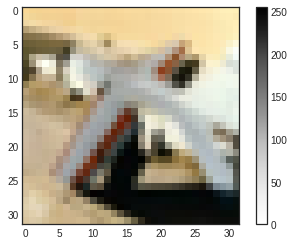

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [9]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

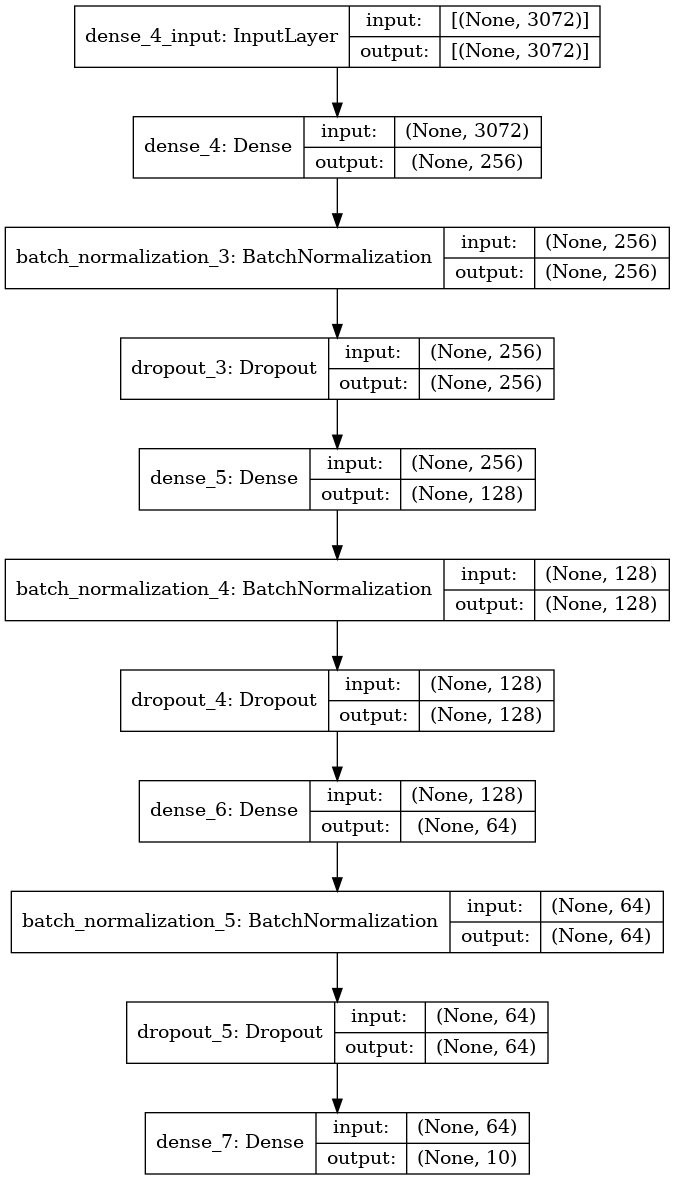

In [10]:
utils.plot_model(model3, show_shapes=True)

In [13]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint("model3.h5", save_best_only=True)

callbacks_es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

history3 = model3.fit(x_train, 
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, callbacks_es])      

Epoch 1/100
313/313 [==============================] - 4s 7ms/step - loss: 2.4263 - accuracy: 0.2088 - val_loss: 1.9178 - val_accuracy: 0.2828
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.9828 - accuracy: 0.2827 - val_loss: 1.8806 - val_accuracy: 0.3191
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8921 - accuracy: 0.3144 - val_loss: 1.7951 - val_accuracy: 0.3356
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8814 - accuracy: 0.3182 - val_loss: 1.8228 - val_accuracy: 0.3286
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8583 - accuracy: 0.3282 - val_loss: 1.7563 - val_accuracy: 0.3770
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8502 - accuracy: 0.3298 - val_loss: 1.7891 - val_accuracy: 0.3492
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8486 - accuracy: 0.3336 - val_loss: 1.7654 - val_accuracy: 0.3544

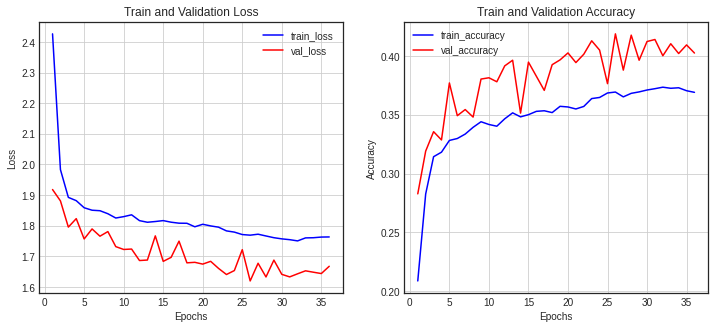

In [16]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history3.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [17]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy  = model3.evaluate(x_test, y_test)
print("테스트 데이터 loss : ", test_loss)
print("테스트 데이터 accuracy : ", test_accuracy )

313/313 [==============================] - 1s 2ms/step - loss: 1.6157 - accuracy: 0.4192
테스트 데이터 loss :  1.6156564950942993
테스트 데이터 accuracy :  0.41920000314712524
